<a href="https://colab.research.google.com/github/PranjalMinocha/JPLasteroid/blob/main/Week%201/Himanshu_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 1 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

I have separated the csv file into two beforehand and hence have uploaded two different files here.

We could have done that here only by making another dataset for those values which have empty diameter value, but there was one data which was not correct according to me as it had some percentage sign or so in the diameter value. Hence, I manually emptied that cell and divided our dataset into two.

In [ ]:
train = pd.read_csv(r'/content/drive/MyDrive/train.csv')
test = pd.read_csv(r'/content/drive/MyDrive/test.csv')

In [ ]:
train.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,NaN,1.028876,0.144621,1.321926,76.871027,88.835789,0.880078,1.177673,1.043645,3.0,...,NaN,NaN,NaN,NaN,NaN,0.000875,APO,0.944408,381.191226,333.147651
1,NaN,1.447192,0.435651,0.458983,152.033180,314.574438,0.816721,2.077662,1.740994,7.0,...,NaN,NaN,NaN,NaN,NaN,0.002754,APO,0.566129,635.898021,30.796013
2,NaN,1.401426,0.300327,3.533720,192.033456,335.403022,0.980541,1.822312,1.659066,10.0,...,NaN,NaN,NaN,NaN,NaN,0.001372,APO,0.594085,605.973788,176.618145
3,NaN,1.214106,0.218542,0.314485,255.919407,36.856749,0.948773,1.479439,1.337806,3.0,...,NaN,NaN,NaN,NaN,NaN,0.001253,APO,0.736748,488.633600,322.437088
4,NaN,1.579408,0.381353,5.716522,2.327029,214.166519,0.977096,2.181721,1.984951,7.0,...,NaN,NaN,NaN,NaN,NaN,0.015294,APO,0.496549,725.003524,192.232616


In [ ]:
test.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Psyche,2.923814,0.133568,3.096005,150.045666,228.823071,2.533285,3.314343,4.999571,12856.0,...,0.299,NaN,X,M,0.2,1.535800,MBA,0.197142,1826.093319,288.335893
1,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
2,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
3,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
4,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065


In [ ]:
train.shape

(137635, 31)

In [ ]:
test.shape

(702079, 31)

In [ ]:
train.describe(include='all')

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
count,15123,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137497.000000,...,964.000000,1.00,1369,964,118.000000,137635.000000,137635,137635.000000,1.376350e+05,137635.000000
unique,15123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31,128,NaN,NaN,11,NaN,NaN,NaN
top,Hathor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,S,S,NaN,NaN,MBA,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,368,329,NaN,NaN,126389,NaN,NaN,NaN
mean,NaN,2.814612,0.145485,10.349235,169.827772,181.904210,2.402608,3.226617,4.884247,8969.790337,...,0.364175,-0.33,NaN,NaN,0.178559,1.420145,NaN,0.219640,1.783971e+03,183.116021
std,NaN,1.522745,0.077574,6.835108,102.713411,103.556763,0.516171,2.896385,25.532657,6165.189701,...,0.095734,NaN,NaN,NaN,0.135162,0.512243,NaN,0.056980,9.325803e+03,103.411484
min,NaN,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,...,0.120000,-0.33,NaN,NaN,-0.250000,0.000166,NaN,0.000128,1.810067e+02,0.000517
25%,NaN,2.536710,0.089622,5.120694,82.334464,91.947794,2.068948,2.864437,4.040308,6291.000000,...,0.289000,-0.33,NaN,NaN,0.100000,1.082515,NaN,0.181231,1.475723e+03,94.300733
50%,NaN,2.750853,0.138543,9.390074,160.438501,183.668021,2.363884,3.167516,4.562568,7572.000000,...,0.360000,-0.33,NaN,NaN,0.185000,1.384930,NaN,0.216024,1.666478e+03,186.826029
75%,NaN,3.092538,0.191141,13.738623,256.268890,271.763348,2.685812,3.468609,5.438519,9731.000000,...,0.439000,-0.33,NaN,NaN,0.250000,1.699390,NaN,0.243948,1.986419e+03,271.467660


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137635 entries, 0 to 137634
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            15123 non-null   object 
 1   a               137635 non-null  float64
 2   e               137635 non-null  float64
 3   i               137635 non-null  float64
 4   om              137635 non-null  float64
 5   w               137635 non-null  float64
 6   q               137635 non-null  float64
 7   ad              137635 non-null  float64
 8   per_y           137635 non-null  float64
 9   data_arc        137497 non-null  float64
 10  condition_code  137635 non-null  int64  
 11  n_obs_used      137635 non-null  int64  
 12  H               136888 non-null  float64
 13  neo             137635 non-null  object 
 14  pha             137635 non-null  object 
 15  diameter        137635 non-null  float64
 16  extent          15 non-null      object 
 17  albedo    

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702079 entries, 0 to 702078
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            6844 non-null    object 
 1   a               702077 non-null  float64
 2   e               702079 non-null  float64
 3   i               702079 non-null  float64
 4   om              702079 non-null  float64
 5   w               702079 non-null  float64
 6   q               702079 non-null  float64
 7   ad              702073 non-null  float64
 8   per_y           702078 non-null  float64
 9   data_arc        686743 non-null  float64
 10  condition_code  701212 non-null  object 
 11  n_obs_used      702079 non-null  int64  
 12  H               700137 non-null  float64
 13  neo             702073 non-null  object 
 14  pha             685637 non-null  object 
 15  diameter        0 non-null       float64
 16  extent          3 non-null       object 
 17  albedo    

Dropping the diameter column from our test dataset.

In [ ]:
test=test.drop('diameter',axis=1)
test.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Psyche,2.923814,0.133568,3.096005,150.045666,228.823071,2.533285,3.314343,4.999571,12856.0,...,0.299,NaN,X,M,0.2,1.535800,MBA,0.197142,1826.093319,288.335893
1,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
2,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
3,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
4,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065


In [ ]:
train.count()

name               15123
a                 137635
e                 137635
i                 137635
om                137635
w                 137635
q                 137635
ad                137635
per_y             137635
data_arc          137497
condition_code    137635
n_obs_used        137635
H                 136888
neo               137635
pha               137635
diameter          137635
extent                15
albedo            136405
rot_per            11187
GM                    13
BV                  1004
UB                   964
IR                     1
spec_B              1369
spec_T               964
G                    118
moid              137635
class             137635
n                 137635
per               137635
ma                137635
dtype: int64

In [ ]:
train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
137630    False
137631    False
137632    False
137633    False
137634    False
Length: 137635, dtype: bool

In [ ]:
test.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
702074    False
702075    False
702076    False
702077    False
702078    False
Length: 702079, dtype: bool

In [ ]:
train.describe(include='all')

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
count,15123,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137497.000000,...,964.000000,1.00,1369,964,118.000000,137635.000000,137635,137635.000000,1.376350e+05,137635.000000
unique,15123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31,128,NaN,NaN,11,NaN,NaN,NaN
top,Hathor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,S,S,NaN,NaN,MBA,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,368,329,NaN,NaN,126389,NaN,NaN,NaN
mean,NaN,2.814612,0.145485,10.349235,169.827772,181.904210,2.402608,3.226617,4.884247,8969.790337,...,0.364175,-0.33,NaN,NaN,0.178559,1.420145,NaN,0.219640,1.783971e+03,183.116021
std,NaN,1.522745,0.077574,6.835108,102.713411,103.556763,0.516171,2.896385,25.532657,6165.189701,...,0.095734,NaN,NaN,NaN,0.135162,0.512243,NaN,0.056980,9.325803e+03,103.411484
min,NaN,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,...,0.120000,-0.33,NaN,NaN,-0.250000,0.000166,NaN,0.000128,1.810067e+02,0.000517
25%,NaN,2.536710,0.089622,5.120694,82.334464,91.947794,2.068948,2.864437,4.040308,6291.000000,...,0.289000,-0.33,NaN,NaN,0.100000,1.082515,NaN,0.181231,1.475723e+03,94.300733
50%,NaN,2.750853,0.138543,9.390074,160.438501,183.668021,2.363884,3.167516,4.562568,7572.000000,...,0.360000,-0.33,NaN,NaN,0.185000,1.384930,NaN,0.216024,1.666478e+03,186.826029
75%,NaN,3.092538,0.191141,13.738623,256.268890,271.763348,2.685812,3.468609,5.438519,9731.000000,...,0.439000,-0.33,NaN,NaN,0.250000,1.699390,NaN,0.243948,1.986419e+03,271.467660


In [ ]:
test.describe(include='all')

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
count,6844,702077.000000,702079.000000,702079.000000,702079.000000,702079.000000,702079.000000,702073.000000,702078.000000,686743.000000,...,15.000000,0.0,297,16,1.0,6.856370e+05,702079,7.020770e+05,7.020730e+05,702071.000000
unique,6844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32,8,NaN,NaN,14,NaN,NaN,NaN
top,Psyche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,S,S,NaN,NaN,MBA,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,77,9,NaN,NaN,621031,NaN,NaN,NaN
mean,NaN,2.746320,0.157626,8.675487,168.239065,180.913394,2.405143,3.416898,7.247008,5031.439651,...,0.378600,NaN,NaN,NaN,0.2,1.424019e+00,NaN,2.408989e-01,2.646988e+03,180.178389
std,NaN,125.093707,0.096650,6.597746,103.169271,104.114477,2.431560,13.883165,275.651894,3325.180377,...,0.101093,NaN,NaN,NaN,NaN,2.455302e+00,NaN,8.442153e-02,1.006822e+05,107.162526
min,NaN,-104279.220900,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,...,0.230000,NaN,NaN,NaN,0.2,3.440000e-07,NaN,2.930000e-08,1.511339e+02,-67.136826
25%,NaN,2.373567,0.091828,3.902917,79.742347,90.848889,1.956371,2.760953,3.656874,3048.000000,...,0.314500,NaN,NaN,NaN,0.2,9.614990e-01,NaN,1.945064e-01,1.335677e+03,85.239416
50%,NaN,2.628609,0.144726,6.918463,160.272482,181.307413,2.199420,3.013497,4.261841,5397.000000,...,0.356000,NaN,NaN,NaN,0.2,1.209600e+00,NaN,2.312673e-01,1.556640e+03,180.356772
75%,NaN,2.950157,0.201053,11.893878,251.324948,271.472570,2.552577,3.333973,5.067291,6817.000000,...,0.471000,NaN,NaN,NaN,0.2,1.563840e+00,NaN,2.695262e-01,1.850835e+03,274.902352


Dropping name column as it does not make any sense while calculating daimeter

In [ ]:
train=train.drop(['name'],axis=1)

In [ ]:
test=test.drop(['name'],axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137635 entries, 0 to 137634
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137635 non-null  float64
 1   e               137635 non-null  float64
 2   i               137635 non-null  float64
 3   om              137635 non-null  float64
 4   w               137635 non-null  float64
 5   q               137635 non-null  float64
 6   ad              137635 non-null  float64
 7   per_y           137635 non-null  float64
 8   data_arc        137497 non-null  float64
 9   condition_code  137635 non-null  int64  
 10  n_obs_used      137635 non-null  int64  
 11  H               136888 non-null  float64
 12  neo             137635 non-null  object 
 13  pha             137635 non-null  object 
 14  diameter        137635 non-null  float64
 15  extent          15 non-null      object 
 16  albedo          136405 non-null  float64
 17  rot_per   

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702079 entries, 0 to 702078
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               702077 non-null  float64
 1   e               702079 non-null  float64
 2   i               702079 non-null  float64
 3   om              702079 non-null  float64
 4   w               702079 non-null  float64
 5   q               702079 non-null  float64
 6   ad              702073 non-null  float64
 7   per_y           702078 non-null  float64
 8   data_arc        686743 non-null  float64
 9   condition_code  701212 non-null  object 
 10  n_obs_used      702079 non-null  int64  
 11  H               700137 non-null  float64
 12  neo             702073 non-null  object 
 13  pha             685637 non-null  object 
 14  extent          3 non-null       object 
 15  albedo          4 non-null       float64
 16  rot_per         7609 non-null    float64
 17  GM        

Dropping columns with very few values in both test and train

In [ ]:
train=train.drop(["extent","rot_per","GM","BV","UB","IR","spec_B","spec_T","G"],axis=1)


In [ ]:
test=test.drop(["extent","rot_per","GM","BV","UB","IR","spec_B","spec_T","G"],axis=1)


In [ ]:
train.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,1.028876,0.144621,1.321926,76.871027,88.835789,0.880078,1.177673,1.043645,3.0,3,...,29.9,Y,N,0.0025,NaN,0.000875,APO,0.944408,381.191226,333.147651
1,1.447192,0.435651,0.458983,152.033180,314.574438,0.816721,2.077662,1.740994,7.0,8,...,26.8,Y,N,0.0080,0.497,0.002754,APO,0.566129,635.898021,30.796013
2,1.401426,0.300327,3.533720,192.033456,335.403022,0.980541,1.822312,1.659066,10.0,7,...,27.3,Y,N,0.0080,0.326,0.001372,APO,0.594085,605.973788,176.618145
3,1.214106,0.218542,0.314485,255.919407,36.856749,0.948773,1.479439,1.337806,3.0,8,...,26.0,Y,N,0.0130,0.397,0.001253,APO,0.736748,488.633600,322.437088
4,1.579408,0.381353,5.716522,2.327029,214.166519,0.977096,2.181721,1.984951,7.0,7,...,26.1,Y,N,0.0150,0.287,0.015294,APO,0.496549,725.003524,192.232616


In [ ]:
test.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma
0,2.923814,0.133568,3.096005,150.045666,228.823071,2.533285,3.314343,4.999571,12856.0,0,2364,5.90,N,N,0.1203,1.535800,MBA,0.197142,1826.093319,288.335893
1,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,0,2152,12.20,N,N,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
2,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,0,2172,11.72,N,N,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
3,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,0,1825,15.40,Y,N,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
4,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,0,2183,13.80,N,N,NaN,0.841461,MBA,0.293329,1227.290668,295.120065


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137635 entries, 0 to 137634
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137635 non-null  float64
 1   e               137635 non-null  float64
 2   i               137635 non-null  float64
 3   om              137635 non-null  float64
 4   w               137635 non-null  float64
 5   q               137635 non-null  float64
 6   ad              137635 non-null  float64
 7   per_y           137635 non-null  float64
 8   data_arc        137497 non-null  float64
 9   condition_code  137635 non-null  int64  
 10  n_obs_used      137635 non-null  int64  
 11  H               136888 non-null  float64
 12  neo             137635 non-null  object 
 13  pha             137635 non-null  object 
 14  diameter        137635 non-null  float64
 15  albedo          136405 non-null  float64
 16  moid            137635 non-null  float64
 17  class     

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702079 entries, 0 to 702078
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               702077 non-null  float64
 1   e               702079 non-null  float64
 2   i               702079 non-null  float64
 3   om              702079 non-null  float64
 4   w               702079 non-null  float64
 5   q               702079 non-null  float64
 6   ad              702073 non-null  float64
 7   per_y           702078 non-null  float64
 8   data_arc        686743 non-null  float64
 9   condition_code  701212 non-null  object 
 10  n_obs_used      702079 non-null  int64  
 11  H               700137 non-null  float64
 12  neo             702073 non-null  object 
 13  pha             685637 non-null  object 
 14  albedo          4 non-null       float64
 15  moid            685637 non-null  float64
 16  class           702079 non-null  object 
 17  n         

Now, we see that we have a charachteristic named 'albedo' which is almost complete in train dataset but almost incomplete in test dataset.

Other than that all the values missing will be filled after seeing the correlation and other charachteristics.

Now, let's first understand the meaning of the terms or charachteristics on which we are measuring the datasets, so that it might be useful in our diameter calculation.


a - Semi major axis - Planetary motion according to Kepler's law follow elliptical path like radius in circle ellipse have two paramters to define its path semi major axis and semi minor axis . (x^2/a^2)+(y^2/b^2)=1
Where a is semi major axis and b is semi minor axis .

e - eccentricity -  Planetary motion according to Kepler's law follow elliptical path it has a parameter eccentricity . Eccentricity of ellipse is less than 1 . The eccentricity helps us to how circular it is with reference to circle . The smaller the eccentricity number, the more circular the realm.

i - inclination with respect to x-y elliptical plane - 
All asteroids and parents follow elliptical following kepler's first law of planetary motion . All these orbits do not lie on the same plane they are usually tilted with each other .We have adopted the plane in which earth moves around the sun as reference plane . i is inclination of asteroid elliptical plane with respect to the elliptical plane in which earth revolves around sun.

om - longitude of the ascending node - The longitude of the ascending node (☊ or Ω) is one of the orbital elements used to specify the orbit of an object in space. It is the angle from a specified reference direction, called the origin of longitude, to the direction of the ascending node, as measured in a specified reference plane.

w - argument of perihelion - Perihelion is the point of closest approach between the orbiting body (asteroids in this case) and the focus . If we rotate the axis of the orbit around the focus then the rotation angle is the argument of perhelion .If we rotate the axis of the orbit around the focus, then the rotation angle is the argument of perihelion (ω)

q - perihelion distance - Perihelion is the point in elliptical path which is closest between revolving body(asteroids in this case) and body around which it revolves(earth in this case) . Perihelion distance is distance between earth and perihelion

ad - aphelion distance - Aphelion is the point in elliptical path which is farthest between revolving body(asteroids in this case) and body around which it revolves(earth in this case) . Aphelion distance is distance between earth and aphelion.

per_y - orbital period - The orbital period (also revolution period) is the amount of time a given astronomical object takes to complete one orbit around another object.


data_Arc - data arc span(d) - Don't know about this yet

condition_Code = orbit condition code - The orbit condition code, also known as the U uncertainty parameter, is an integer between 0 and 9 indicating how well an object's orbit is known on a logarithmic scale, where 0 indicates a well-determined orbit.

n_obs_used - number of observation used - Calculating diameter of asteroids is very hard for that we need to make multiple observation with powerful telescopes. Number of observation used in a datapoint gives us value of number of observation made to calculate diameter of asteroids

H - absolute magnitude parameter - An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (AU) away, and 1 AU from the Sun and at a zero phase angle.

neo-Near earth object - A near-Earth object (NEO) is any small Solar System body whose orbit brings it into proximity with Earth. By convention, a Solar System body is a NEO if its closest approach to the Sun (perihelion) is less than 1.3 astronomical units (AU). If a NEO's orbit crosses the Earth's, and the object is larger than 140 meters (460 ft) across, it is considered a potentially hazardous object (PHO).Most known PHOs and NEOs are asteroids, but a small fraction are comets.

pha - Physically hazardous object - This feature denotes whether the asteroid is hazardous or not. A potentially hazardous object (PHO) is a near-Earth object – either an asteroid or a comet – with an orbit that can make close approaches to the Earth and is large enough to cause significant regional damage in the event of impact.They are defined as having a minimum orbit intersection distance with Earth of less than 0.05 astronomical units (19.5 lunar distances) and an absolute magnitude of 22 or brighter.

albedo - geometric albedo  - Albedo refers to an object's measure of reflectivity, or intrinsic brightness. A white, perfectly reflecting surface has an albedo of 1.0; a black, perfectly absorbing surface has an albedo of 0.0. Geometric albedo is the ratio of a body's brightness at zero phase angle to the brightness of a perfectly diffusing disk with the same position and apparent size as the body.

moid - Earth Minimum orbit Intersection Distance(au) - A large MOID between and asteroid and the Earth indicates the asteroid will not collide with Earth in the near term. Asteroids with a small MOID to Earth should be carefully followed because they can become Earth colliders.

class - asteroid orbit class - 

n - Mean motion(deg/d) - the angular speed required for a body to complete one orbit

per - orbital Period(d)

ma - Mean anomaly(deg)

diameter - diameter of asteroids


References used to gather these information:-

https://www.kaggle.com/code/skkarn02/asteroid-diameter-prediction

https://www.kaggle.com/code/sudhanshublaze/adp-boosting-nn 

Things to be added later on

In [ ]:
train.describe(include='all')

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
count,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137635.000000,137497.000000,137635.000000,...,136888.000000,137635,137635,137635.000000,136405.000000,137635.000000,137635,137635.000000,1.376350e+05,137635.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,2,NaN,NaN,NaN,11,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,N,N,NaN,NaN,NaN,MBA,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,136785,137414,NaN,NaN,NaN,126389,NaN,NaN,NaN
mean,2.814612,0.145485,10.349235,169.827772,181.904210,2.402608,3.226617,4.884247,8969.790337,0.485211,...,15.177109,NaN,NaN,5.481626,0.130066,1.420145,NaN,0.219640,1.783971e+03,183.116021
std,1.522745,0.077574,6.835108,102.713411,103.556763,0.516171,2.896385,25.532657,6165.189701,1.966085,...,1.407436,NaN,NaN,9.366928,0.109994,0.512243,NaN,0.056980,9.325803e+03,103.411484
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,0.000000,...,3.200000,NaN,NaN,0.002500,0.001000,0.000166,NaN,0.000128,1.810067e+02,0.000517
25%,2.536710,0.089622,5.120694,82.334464,91.947794,2.068948,2.864437,4.040308,6291.000000,0.000000,...,14.400000,NaN,NaN,2.770000,0.053000,1.082515,NaN,0.181231,1.475723e+03,94.300733
50%,2.750853,0.138543,9.390074,160.438501,183.668021,2.363884,3.167516,4.562568,7572.000000,0.000000,...,15.300000,NaN,NaN,3.956000,0.078000,1.384930,NaN,0.216024,1.666478e+03,186.826029
75%,3.092538,0.191141,13.738623,256.268890,271.763348,2.685812,3.468609,5.438519,9731.000000,0.000000,...,16.100000,NaN,NaN,5.741500,0.188000,1.699390,NaN,0.243948,1.986419e+03,271.467660


In [ ]:
test.describe(include='all')

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma
count,702077.000000,702079.000000,702079.000000,702079.000000,702079.000000,702079.000000,702073.000000,702078.000000,686743.000000,701212.0,702079.000000,700137.000000,702073,685637,4.000000,6.856370e+05,702079,7.020770e+05,7.020730e+05,702071.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,2,2,NaN,NaN,14,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,N,N,NaN,NaN,MBA,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424318.0,NaN,NaN,681523,683843,NaN,NaN,621031,NaN,NaN,NaN
mean,2.746320,0.157626,8.675487,168.239065,180.913394,2.405143,3.416898,7.247008,5031.439651,NaN,177.674108,17.100862,NaN,NaN,0.188825,1.424019e+00,NaN,2.408989e-01,2.646988e+03,180.178389
std,125.093707,0.096650,6.597746,103.169271,104.114477,2.431560,13.883165,275.651894,3325.180377,NaN,234.818246,1.724631,NaN,NaN,0.085529,2.455302e+00,NaN,8.442153e-02,1.006822e+05,107.162526
min,-104279.220900,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,NaN,2.000000,-1.100000,NaN,NaN,0.110000,3.440000e-07,NaN,2.930000e-08,1.511339e+02,-67.136826
25%,2.373567,0.091828,3.902917,79.742347,90.848889,1.956371,2.760953,3.656874,3048.000000,NaN,43.000000,16.300000,NaN,NaN,0.117725,9.614990e-01,NaN,1.945064e-01,1.335677e+03,85.239416
50%,2.628609,0.144726,6.918463,160.272482,181.307413,2.199420,3.013497,4.261841,5397.000000,NaN,96.000000,17.000000,NaN,NaN,0.186650,1.209600e+00,NaN,2.312673e-01,1.556640e+03,180.356772
75%,2.950157,0.201053,11.893878,251.324948,271.472570,2.552577,3.333973,5.067291,6817.000000,NaN,210.000000,17.800000,NaN,NaN,0.257750,1.563840e+00,NaN,2.695262e-01,1.850835e+03,274.902352


Now, we have to firstly fill the missing datas

Before that, let's analyse some graphs.

Also, we will now work almost only on train dataset except for filling missing datas in the test dataset

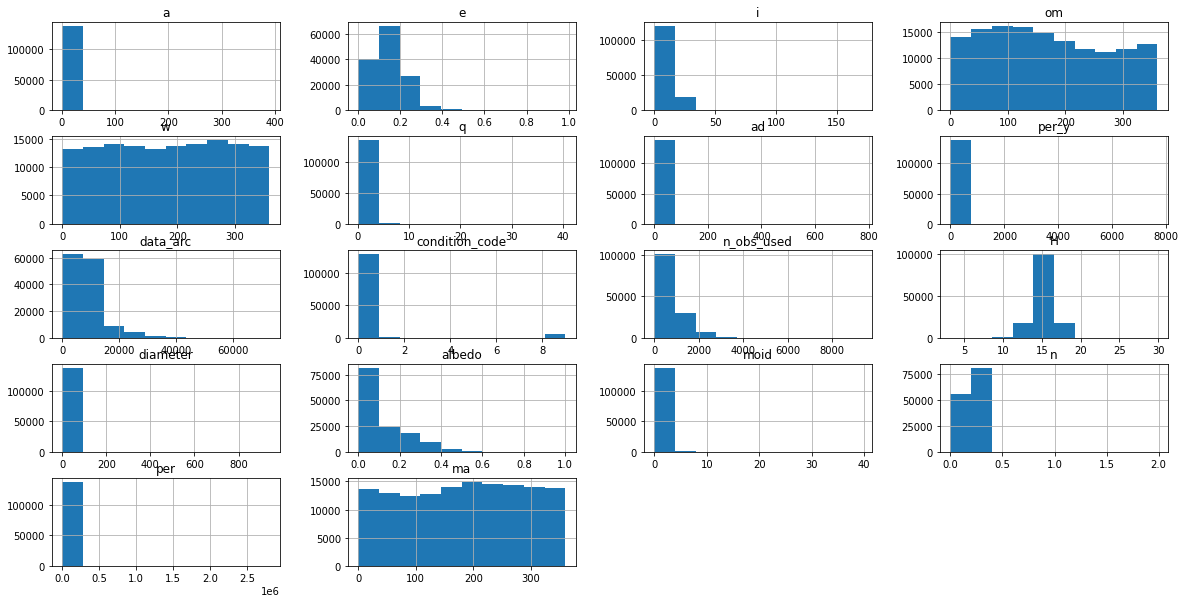

In [ ]:
train.hist(figsize=(20,10));
plt.show;

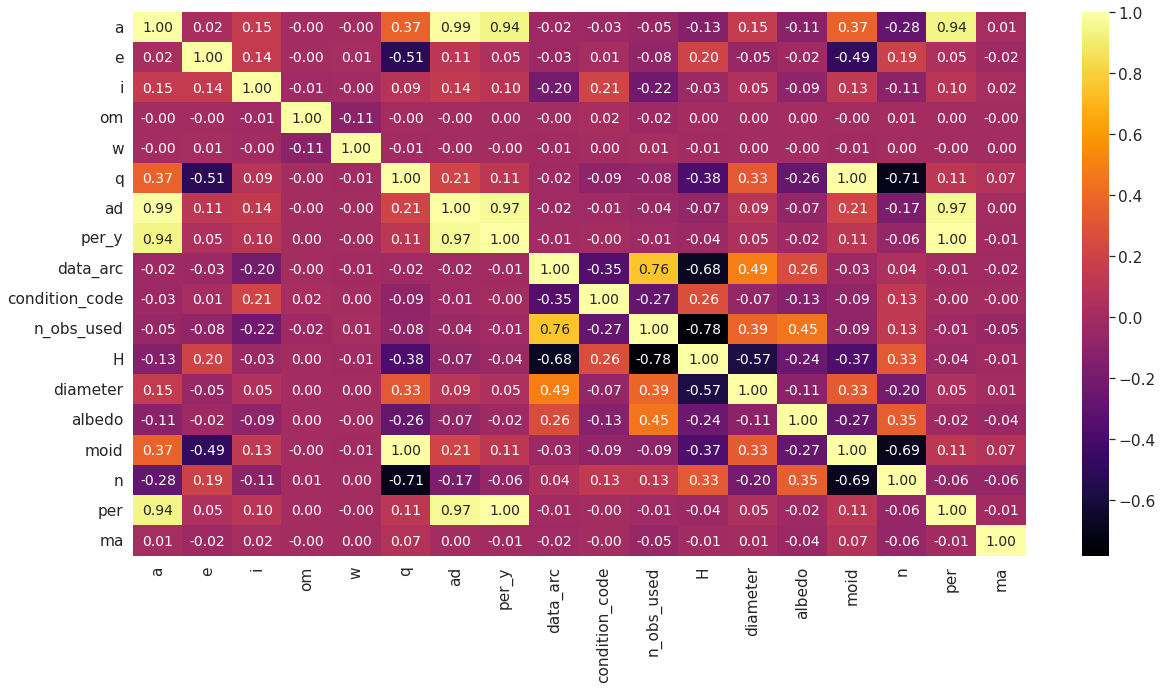

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(train.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':14});